In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [0]:
import pandas as pd
PATH2="/content/drive/My Drive/ME/M.E Semester 3/SAT- IoT/Data- Parkinsons Analysis/Activity 1 Final Data/"
acc0 = pd.read_csv(PATH2+"acc_final_v3_0.csv")
acc1 = pd.read_csv(PATH2+"acc_final_v3_1.csv")
acc2 = pd.read_csv(PATH2+"acc_final_v3_2.csv")
acc3 = pd.read_csv(PATH2+"acc_final_v3_3.csv")



In [0]:
train=pd.concat([acc0,acc1,acc2,acc3],axis=0)
train['Tremor']=train['Tremor'].replace(2,1)

In [4]:
train.describe()

,accX_mean,accY_mean,accZ_mean,accX_mad,accY_mad,accZ_mad,accX_std,accY_std,accZ_std,accX_min,accY_min,accZ_min,accX_max,accY_max,accZ_max,accX_iqr,accY_iqr,accZ_iqr,accX_skew,accY_skew,accZ_skew,accX_kurtosis,accY_kurtosis,accZ_kurtosis,accX_sma,accY_sma,accZ_sma,accX_energy,accY_energy,accZ_energy,accX_entropy,accY_entropy,accZ_entropy,Tremor
count,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1.505000e+03,1505.000000
mean,6.837574e+22,4.803264e+22,7.450175e+23,2.473303e+22,1.923949e+22,2.733772e+22,4.416705e+22,2.758256e+22,7.327504e+22,2.243569e+22,1.265453e+22,6.912617e+23,4.888967e+23,2.251367e+23,1.754483e+24,3.416617e+22,2.737382e+22,3.475483e+22,2.209034,2.103165,2.693449,23.165338,21.077248,35.404739,6.837574e+22,4.803264e+22,7.450175e+23,6.880384e+47,2.658895e+47,3.654163e+49,-1.157325e+50,-2.852141e+49,-6.354604e+51,0.558804
std,5.512498e+23,4.414847e+23,5.923660e+24,2.764089e+23,1.812142e+23,2.830213e+23,6.148082e+23,2.609359e+23,9.567602e+23,2.387147e+23,1.785809e+23,5.781568e+24,1.050601e+25,3.008697e+24,2.015884e+25,2.677499e+23,2.097207e+23,3.473418e+23,4.050104,3.850161,5.313377,72.060508,70.040520,103.661301,5.512498e+23,4.414847e+23,5.923660e+24,1.314245e+49,4.462091e+48,3.027576e+50,1.494606e+51,3.148284e+50,5.164709e+52,0.496695
min,9.215876e-01,3.946381e-01,1.156605e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.319995e-02,8.461246e-03,1.501154e-02,2.037930e+00,7.762455e-01,2.644453e+00,8.785491e-01,6.682037e-01,1.147967e+00,-0.703127,-1.097726,-1.199501,-3.000000,-3.000000,-3.000000,9.215876e-01,3.946381e-01,1.156605e+00,1.088922e+00,1.926746e-01,1.618407e+00,-2.190093e+52,-4.560098e+51,-5.361768e+53,0.000000
25%,1.214365e+01,1.047970e+01,1.702233e+01,7.573622e+00,5.292347e+00,7.135052e+00,1.194625e+01,8.465983e+00,8.406010e+00,1.013332e+00,7.295241e-01,9.679057e-01,5.832298e+01,4.308701e+01,4.073145e+01,4.809812e+00,2.744026e+00,6.170990e+00,0.409803,0.355955,0.393755,-0.417965,-0.459491,-0.480609,1.214365e+01,1.047970e+01,1.702233e+01,4.857363e+02,2.716319e+02,3.672863e+02,-1.679914e+42,-1.882967e+42,-2.060267e+44,0.000000
50%,5.517300e+01,4.717343e+01,7.692841e+01,2.422592e+01,2.183103e+01,4.081595e+01,3.350054e+01,3.119826e+01,5.632643e+01,6.289600e+00,4.830750e+00,8.162238e+00,1.776995e+02,1.696259e+02,2.737852e+02,3.732676e+01,3.309359e+01,5.172448e+01,0.700620,0.696404,0.698435,0.239461,0.175556,0.167687,5.517300e+01,4.717343e+01,7.692841e+01,4.361035e+03,3.356091e+03,1.421211e+04,-9.082120e+04,-5.858380e+04,-1.564546e+06,1.000000
75%,3.606007e+19,2.531381e+19,4.630209e+19,1.462030e+19,1.006620e+19,1.580897e+19,1.840578e+19,1.294295e+19,2.074157e+19,3.255324e+18,2.104735e+18,4.488051e+18,9.650998e+19,7.349972e+19,9.472184e+19,2.232286e+19,1.703482e+19,2.795456e+19,1.304355,1.429818,1.129040,2.092842,2.168332,1.552840,3.606007e+19,2.531381e+19,4.630209e+19,2.172660e+39,1.022017e+39,2.642959e+39,-5.830618e+03,-6.347291e+03,-9.277160e+05,1.000000
max,1.170513e+25,1.117369e+25,5.605601e+25,8.057148e+24,4.436236e+24,6.445778e+24,1.912646e+25,5.741424e+24,3.303517e+25,6.668021e+24,4.202774e+24,5.526136e+25,3.990429e+26,1.047896e+26,7.013494e+26,3.487069e+24,2.553992e+24,5.014370e+24,25.424326,26.179370,26.958530,660.797053,688.874117,724.842151,1.170513e+25,1.117369e+25,5.605601e+25,4.104312e+50,1.523185e+50,3.144645e+51,-2.234180e+02,-2.780816e+02,-4.769938e+05,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1152x576 with 0 Axes>

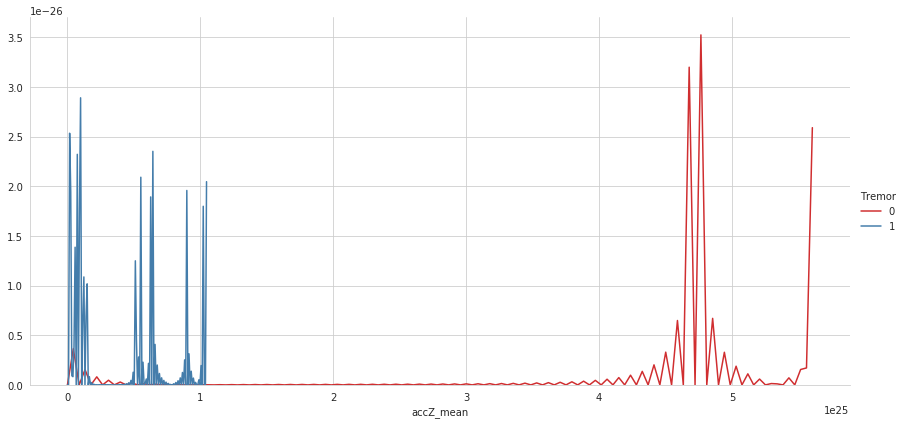

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize=(16,8))

sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='Tremor', size=6,aspect=2)
facetgrid.map(sns.distplot,'accZ_mean', hist=False)\
    .add_legend()


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1152x576 with 0 Axes>

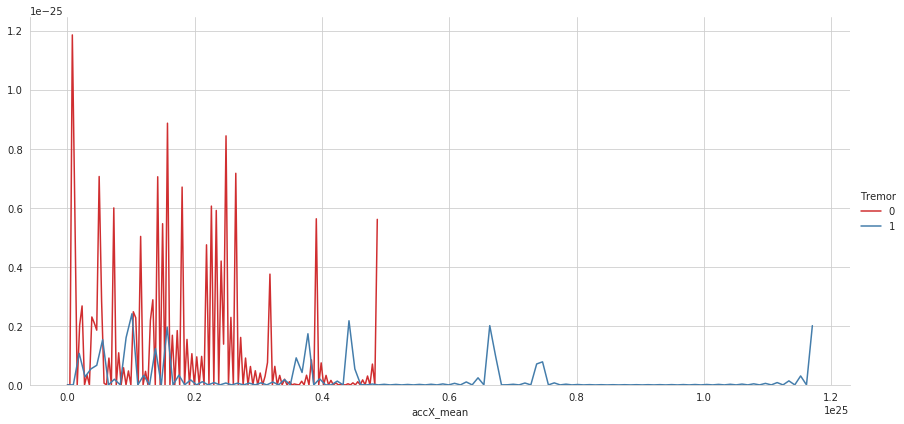

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize=(16,8))

sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='Tremor', size=6,aspect=2)
facetgrid.map(sns.distplot,'accX_mean', hist=False)\
    .add_legend()

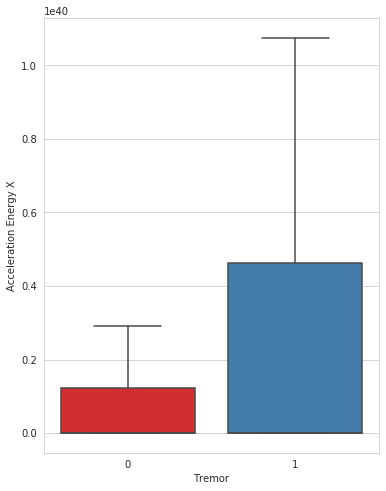

In [56]:
plt.figure(figsize=(6,8))
sns.boxplot(x='Tremor', y='accX_energy',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Energy X')

plt.show()

In [0]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['*', 'o'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


In [0]:
from sklearn.preprocessing import normalize
X_norm= normalize(train.drop(['Tremor'], axis=1), norm='l2')
from sklearn.preprocessing import MinMaxScaler
X_new2 = MinMaxScaler().fit_transform(X_norm)


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 1505 samples in 0.006s...
[t-SNE] Computed neighbors for 1505 samples in 0.049s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1505
[t-SNE] Computed conditional probabilities for sample 1505 / 1505
[t-SNE] Mean sigma: 0.000005
[t-SNE] Computed conditional probabilities in 0.012s
[t-SNE] Iteration 50: error = 96.2431641, gradient norm = 0.3280104 (50 iterations in 0.604s)
[t-SNE] Iteration 100: error = 84.2659454, gradient norm = 0.2831773 (50 iterations in 0.424s)
[t-SNE] Iteration 150: error = 78.8933105, gradient norm = 0.2631811 (50 iterations in 0.376s)
[t-SNE] Iteration 200: error = 75.8723373, gradient norm = 0.2623194 (50 iterations in 0.393s)
[t-SNE] Iteration 250: error = 73.8029861, gradient norm = 0.2618926 (50 iterations in 0.389s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.802986
[t-SNE] Iteration 300: erro

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


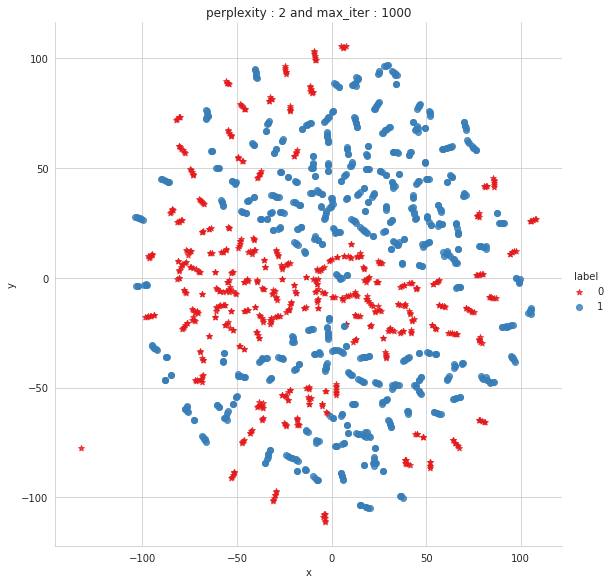

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1505 samples in 0.003s...
[t-SNE] Computed neighbors for 1505 samples in 0.064s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1505
[t-SNE] Computed conditional probabilities for sample 1505 / 1505
[t-SNE] Mean sigma: 0.001538
[t-SNE] Computed conditional probabilities in 0.020s
[t-SNE] Iteration 50: error = 85.9054337, gradient norm = 0.2169190 (50 iterations in 0.613s)
[t-SNE] Iteration 100: error = 74.8143768, gradient norm = 0.1675455 (50 iterations in 0.350s)
[t-SNE] Iteration 150: error = 71.1228485, gradient norm = 0.1407098 (50 iterations in 0.316s)
[t-SNE] Iteration 200: error = 68.9841766, gradient norm = 0.1193046 (50 iterations in 0.310s)
[t-SNE] Iteration 250: error = 67.6155548, gradient norm = 0.1206289 (50 iterations in 0.304s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.615555
[t-SNE] Iteration 300

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


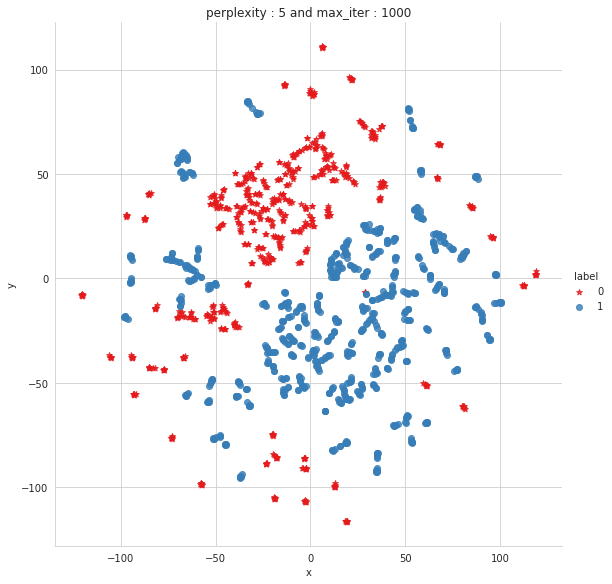

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1505 samples in 0.003s...
[t-SNE] Computed neighbors for 1505 samples in 0.071s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1505
[t-SNE] Computed conditional probabilities for sample 1505 / 1505
[t-SNE] Mean sigma: 0.004446
[t-SNE] Computed conditional probabilities in 0.036s
[t-SNE] Iteration 50: error = 77.2721100, gradient norm = 0.1775299 (50 iterations in 0.642s)
[t-SNE] Iteration 100: error = 67.9027481, gradient norm = 0.1057987 (50 iterations in 0.349s)
[t-SNE] Iteration 150: error = 65.1055145, gradient norm = 0.0903556 (50 iterations in 0.321s)
[t-SNE] Iteration 200: error = 63.8091507, gradient norm = 0.0832291 (50 iterations in 0.311s)
[t-SNE] Iteration 250: error = 63.0119095, gradient norm = 0.0686061 (50 iterations in 0.307s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.011909
[t-SNE] Iteration 30

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


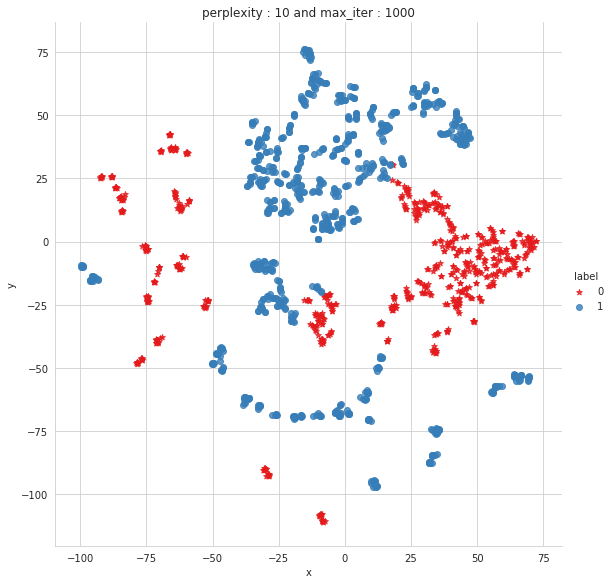

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1505 samples in 0.003s...
[t-SNE] Computed neighbors for 1505 samples in 0.093s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1505
[t-SNE] Computed conditional probabilities for sample 1505 / 1505
[t-SNE] Mean sigma: 0.009383
[t-SNE] Computed conditional probabilities in 0.068s
[t-SNE] Iteration 50: error = 71.4420776, gradient norm = 0.1866992 (50 iterations in 0.749s)
[t-SNE] Iteration 100: error = 62.1497879, gradient norm = 0.0704366 (50 iterations in 0.410s)
[t-SNE] Iteration 150: error = 60.2973480, gradient norm = 0.0534500 (50 iterations in 0.383s)
[t-SNE] Iteration 200: error = 59.4718208, gradient norm = 0.0438187 (50 iterations in 0.382s)
[t-SNE] Iteration 250: error = 58.9995766, gradient norm = 0.0425456 (50 iterations in 0.386s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.999577
[t-SNE] Iteration 30

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


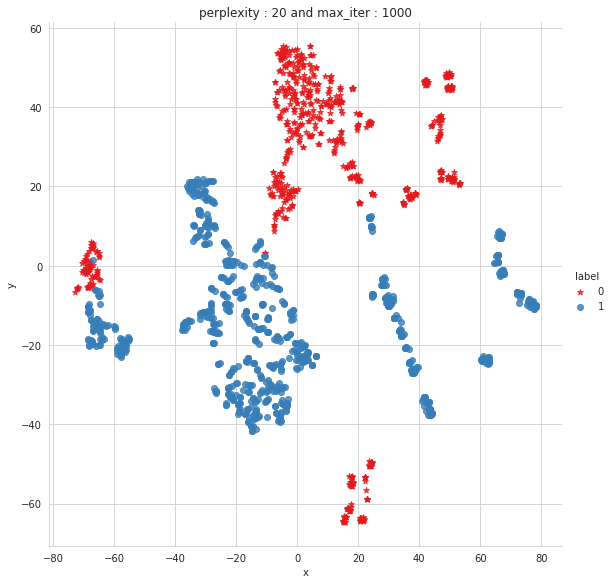

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1505 samples in 0.003s...
[t-SNE] Computed neighbors for 1505 samples in 0.137s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1505
[t-SNE] Computed conditional probabilities for sample 1505 / 1505
[t-SNE] Mean sigma: 0.021396
[t-SNE] Computed conditional probabilities in 0.159s
[t-SNE] Iteration 50: error = 60.2343140, gradient norm = 0.1484631 (50 iterations in 0.831s)
[t-SNE] Iteration 100: error = 54.0693626, gradient norm = 0.0445249 (50 iterations in 0.518s)
[t-SNE] Iteration 150: error = 53.1932144, gradient norm = 0.0324330 (50 iterations in 0.485s)
[t-SNE] Iteration 200: error = 52.8959885, gradient norm = 0.0402353 (50 iterations in 0.477s)
[t-SNE] Iteration 250: error = 52.7547379, gradient norm = 0.0246116 (50 iterations in 0.466s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.754738
[t-SNE] Iteration 3

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


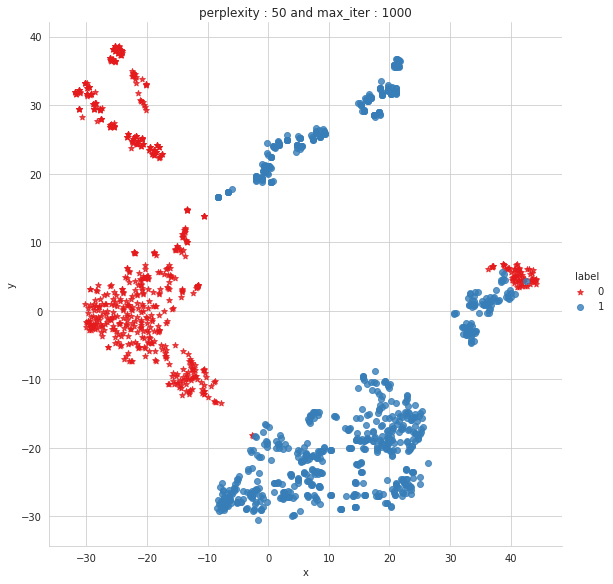

Done


In [57]:
X_pre_tsne = X_new2
y_pre_tsne =train['Tremor']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])